In [41]:
import numpy as np
def split_pivot(t: np.ndarray, mid: int)-> tuple[np.ndarray, int, np.ndarray]:

    t_l = [u for u in t if u < mid]
    t_r = [u for u in t if u > mid]
    return t_l, mid, t_r

In [42]:
def pivot5(t: np.ndarray)-> int:
    
    tam = len(t)
    
    if(tam<5):
        return np.median(t)
    
    grupos_5 = [t[i:i+5] for i in range(0, tam, 5)]
    
    medianas = [np.median(grupo_5) for grupo_5 in grupos_5]
    
    
    return pivot5(np.array(medianas))

In [43]:
def qsort_5(t: np.ndarray)-> np.ndarray:
    
    if len(t) <= 1:
        return t
    
    if len(t) ==2:
        if t[0] <= t[1]:
            m = t[0]
        else:
            m = t[1]
    
    else:
        m = int(pivot5(t))
    
    t_l, _, t_r = split_pivot(t, m)
    
    tizq_ordenada = qsort_5(t_l)
    tdre_ordenada = qsort_5(t_r)
    
    return np.concatenate([tizq_ordenada, np.array([int(m)]), tdre_ordenada]).astype(int)

In [44]:
import sys
import time
import matplotlib.pyplot as plt
import random
import numpy as np

# Definir la función qsort_5 y otras funciones necesarias

l_timings = []

for i, size in enumerate(range(5, 20)):
    t = list(range(2**i * size))
    
    # Asegurémonos de tener una clave (key) válida para la función %timeit
    key = None
    
    start_time = time.time()
    _ = qsort_5(t)
    end_time = time.time()
    
    elapsed_time = end_time - start_time
    l_timings.append([len(t), elapsed_time])

a_timings = np.array(l_timings)

# Imprimir los resultados
print(a_timings)

[[5.00000000e+00 0.00000000e+00]
 [1.20000000e+01 0.00000000e+00]
 [2.80000000e+01 0.00000000e+00]
 [6.40000000e+01 4.33588028e-03]
 [1.44000000e+02 2.07996368e-03]
 [3.20000000e+02 8.08858871e-03]
 [7.04000000e+02 3.36968899e-02]
 [1.53600000e+03 7.79709816e-02]
 [3.32800000e+03 1.12345695e-01]
 [7.16800000e+03 3.18258762e-01]
 [1.53600000e+04 7.65546799e-01]
 [3.27680000e+04 1.54760337e+00]
 [6.96320000e+04 3.44625735e+00]
 [1.47456000e+05 8.85750675e+00]
 [3.11296000e+05 2.15453627e+01]]


Advertencia: El tiempo de ejecución inicial es cero. No se puede normalizar.


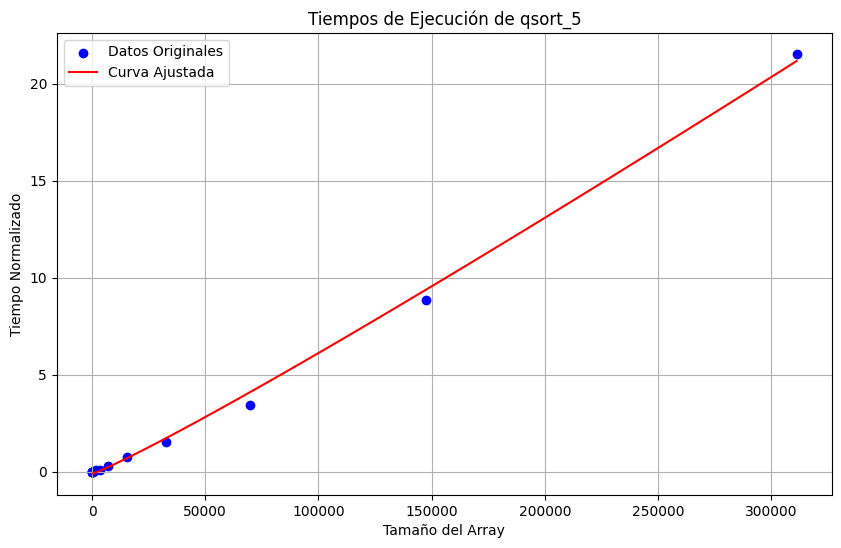

In [45]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def f(x):
    return x * np.log(x)

# Función a ajustar
def tofit(x, a, b):
    return a * f(x) + b

x = a_timings[:, 0]
y = a_timings[:, 1]

# Verificar si y[0] es cero antes de normalizar
if y[0] != 0:
    y = y / y[0]
else:
    print("Advertencia: El tiempo de ejecución inicial es cero. No se puede normalizar.")

pars, _ = curve_fit(tofit, x, y)

# Graficar los datos y la curva ajustada
plt.figure(figsize=(10, 6))

# Graficar los datos originales
plt.scatter(x, y, label='Datos Originales', color='blue')

# Graficar la curva ajustada
x_fit = np.linspace(min(x), max(x), 100)
y_fit = tofit(x_fit, *pars)
plt.plot(x_fit, y_fit, label='Curva Ajustada', color='red')

# Configurar el gráfico
plt.title('Tiempos de Ejecución de qsort_5')
plt.xlabel('Tamaño del Array')
plt.ylabel('Tiempo Normalizado')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
